# 1. Data Preprocessing

## Total EVs

Data_Year                 0
Quarter               10034
County                    0
FUEL_TYPE                 0
MAKE                      0
MODEL                     0
Number of Vehicles        0
dtype: int64
4199
4199


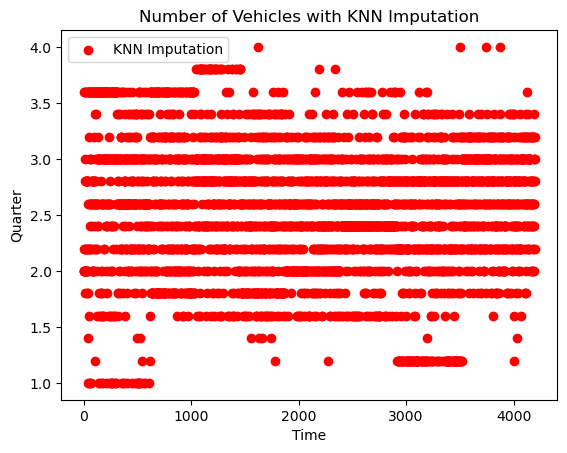

    Data_Year Quarter  Number of Vehicles
0        2010      Q1                   4
1        2010      Q2                 358
2        2010      Q3                 108
3        2010      Q4                  12
4        2011      Q1                  71
5        2011      Q2                2981
6        2011      Q3                1995
7        2011      Q4                  32
8        2012      Q1                  52
9        2012      Q2                3244
10       2012      Q3                1721
11       2012      Q4                 138
12       2013      Q1                2274
13       2013      Q2                6943
14       2013      Q3               11865
15       2013      Q4                  85
16       2014      Q1                1620
17       2014      Q2               15656
18       2014      Q3               12030
19       2014      Q4                 214
20       2015      Q1                   0
21       2015      Q2               20488
22       2015      Q3             

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Correct raw URL of the Excel file on GitHub
file_path = "https://raw.githubusercontent.com/trangng99/businessproject/a13a1db01f49a46b3d0891bc62d521fd32095da1/Total_EVs.xlsx"

# Read the Excel file from GitHub using pandas
df5 = pd.read_excel(file_path, engine='openpyxl')

num_rows = len(df5)
null_counts = df5.isnull().sum()
print(null_counts)

# Filter the data by the values 'Electric' in the 'FUEL_TYPE' column
filtered_df5 = df5[df5['FUEL_TYPE'].isin(['Electric'])]

# Exclude rows with the year 2024
cleaned_df5 = filtered_df5[filtered_df5['Data_Year'] != 2024]

# Keep only 'Data_Year', 'Quarter', and 'Number of Vehicles' columns
final5 = cleaned_df5[['Data_Year', 'Quarter', 'Number of Vehicles']]

# Exclude data between 1998 and 2009
final5 = final5[(final5['Data_Year'] < 1998) | (final5['Data_Year'] > 2009)]

# Resetting index after filtering
final5 = final5.reset_index(drop=True)

# Replace quarter values with numeric values
final5['Quarter'] = final5['Quarter'].replace({'Q4': 4, 'Q3': 3, 'Q2': 2, 'Q1': 1})

# Create a copy to avoid modifying the original DataFrame
df_imputed = final5[['Data_Year', 'Quarter', 'Number of Vehicles']].copy()

# Identify rows with missing 'Quarter' values
missing_quarter_indices = df_imputed[df_imputed['Quarter'].isna()].index

# Define features for KNN Imputer
features = ['Number of Vehicles', 'Data_Year']
feature_matrix = df_imputed[features].values

# Use the KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_matrix = imputer.fit_transform(df_imputed)

# Update the DataFrame with imputed 'Quarter' values
df_imputed.loc[missing_quarter_indices, 'Quarter'] = imputed_matrix[missing_quarter_indices, df_imputed.columns.get_loc('Quarter')]

# Verify lengths
print(len(missing_quarter_indices))
print(len(df_imputed.loc[missing_quarter_indices, 'Quarter']))

# Plot the results
plt.scatter(missing_quarter_indices, df_imputed.loc[missing_quarter_indices, 'Quarter'], color='red', label='KNN Imputation')
plt.title('Number of Vehicles with KNN Imputation')
plt.xlabel('Time')
plt.ylabel('Quarter')
plt.legend()
plt.show()

# Round and replace the numeric quarter values back to string format
df_imputed['Quarter'] = round(df_imputed['Quarter'], 0)
df_imputed['Quarter'] = df_imputed['Quarter'].replace({4: 'Q4', 3: 'Q3', 2: 'Q2', 1: 'Q1'})

# Sum the 'Number of Vehicles' for each 'Data_Year' and 'Quarter' combination
df_imputed = df_imputed.groupby(['Data_Year', 'Quarter'])['Number of Vehicles'].sum().reset_index()

# Create a MultiIndex DataFrame with all combinations of years and quarters
years = df_imputed['Data_Year'].unique()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
full_index = pd.MultiIndex.from_product([years, quarters], names=['Data_Year', 'Quarter'])

# Set the index of the imputed DataFrame and reindex with the full index
df_imputed.set_index(['Data_Year', 'Quarter'], inplace=True)
quarterly_ev_totals = df_imputed.reindex(full_index, fill_value=0).reset_index()

# Display the quarterly totals
print(quarterly_ev_totals)

print(quarterly_ev_totals.isnull().sum())

## Total EV charging stations

In [2]:
import pandas as pd

# Replace this URL with the raw URL of your CSV file from GitHub
csv_url = "https://raw.githubusercontent.com/trangng99/businessproject/dbc80921f4d59e1ca5b34f9f64340c7c68431d6e/alt_fuel_stations%20(Jun%2030%202024).csv"
df4 = pd.read_csv(csv_url)

# Select only the desired columns
filtered_data4 = df4[['Fuel Type Code', 'City', 'Open Date', 'Groups With Access Code','Latitude', 'Longitude','ZIP','State']]

# Filter out rows where "Groups With Access Code" is "TEMPORARILY UNAVAILABLE (Public)"
filtered_data4 = filtered_data4[filtered_data4['Groups With Access Code'] != 'TEMPORARILY UNAVAILABLE (Public)']

# Check and convert the "Open Date" column to datetime format
filtered_data4['Open Date'] = pd.to_datetime(filtered_data4['Open Date'], errors='coerce')

# Filter out dates before 2010 and after 2023
filtered_data4 = filtered_data4[
    (filtered_data4['Open Date'] >= '2010-01-01') & 
    (filtered_data4['Open Date'] <= '2023-12-31')
]

# Add columns for year and quarter
filtered_data4['Year'] = filtered_data4['Open Date'].dt.year
filtered_data4['Quarter'] = filtered_data4['Open Date'].dt.quarter

# Group by year and quarter and count the number of entries
stations_quarterly_counts = filtered_data4.groupby(['Year', 'Quarter']).size().reset_index(name='Charging Stations Count')

# Create a MultiIndex DataFrame with all combinations of years and quarters
years = range(2010, 2024)
quarters = [1, 2, 3, 4]
full_index = pd.MultiIndex.from_product([years, quarters], names=['Year', 'Quarter'])

# Set the index of the counts DataFrame and reindex with the full index
stations_quarterly_counts.set_index(['Year', 'Quarter'], inplace=True)
stations_quarterly_counts = stations_quarterly_counts.reindex(full_index, fill_value=0).reset_index()

# Display the quarterly counts
print(stations_quarterly_counts)

filtered_data4

    Year  Quarter  Charging Stations Count
0   2010        1                        1
1   2010        2                        1
2   2010        3                        0
3   2010        4                        2
4   2011        1                       77
5   2011        2                        1
6   2011        3                        5
7   2011        4                       25
8   2012        1                       43
9   2012        2                       22
10  2012        3                       17
11  2012        4                       15
12  2013        1                       44
13  2013        2                       20
14  2013        3                       28
15  2013        4                       21
16  2014        1                       35
17  2014        2                       34
18  2014        3                       64
19  2014        4                       65
20  2015        1                       80
21  2015        2                      117
22  2015   

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_1600/2226597181.py:5: DtypeWarning: Columns (6,20,31,46,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv(csv_url)


Fuel Type Code              City  Open Date  \
3               ELEC         Sepulveda 2012-12-11   
8               ELEC        Long Beach 2012-05-04   
13              ELEC      Palm Springs 2011-12-12   
17              ELEC      Santa Monica 2019-04-08   
23              ELEC        Sacramento 2019-11-01   
...              ...               ...        ...   
17481           ELEC            Irvine 2023-12-13   
17482           ELEC             Vista 2023-12-14   
17483           ELEC  Huntington Beach 2023-12-21   
17484           ELEC          El Cajon 2023-12-28   
17496           ELEC        Healdsburg 2023-12-01   

                 Groups With Access Code   Latitude   Longitude      ZIP  \
3                    Public - Call ahead  34.221665 -118.468371  91343.0   
8                                 Public  33.763700 -118.192000  90802.0   
13                                Public  33.824004 -116.543589  92262.0   
17                                Public  34.010021 -118.495830  90405.0   
23                                Public  38.599693 -121.427045  95815.0   
...                                  ...        ...         ...      ...   
17481  Public - Credit card at all times  33.631220 -117.721790    92618   
17482  Public - Credit card at all times  33.197868 -117.249153    92083   
17483  Public - Credit card at all times  33.684440 -117.989420    92648   
17484  Public - Credit card at all times  32.803100 -116.973260    92020   
17496                             Public  38.640470 -122.873710    95448   

      State  Year  Quarter  
3        CA  2012        4  
8        CA  2012        2  
13       CA  2011        4  
17       CA  2019        2  
23       CA  2019        4  
...     ...   ...      ...  
17481    CA  2023        4  
17482    CA  2023        4  
17483    CA  2023        4  
17484    CA  2023        4  
17496    CA  2023        4  

[14874 rows x 10 columns]

In [3]:


# Group data by city and count the number of charging stations
city_counts = filtered_data4['City'].value_counts()

# Select the 10 cities with the lowest number of charging stations
bottom_10_cities = city_counts.tail(10)

# Filter the data of these cities in the original table
bottom_10_cities_data = filtered_data4[filtered_data4['City'].isin(bottom_10_cities.index)]

# Show data table
bottom_10_cities_data



Fuel Type Code             City  Open Date  \
4406            ELEC  Running Springs 2020-10-02   
4536            ELEC            Somis 2018-08-24   
4552            ELEC             Clio 2018-10-22   
4553            ELEC  Playa Vista, CA 2020-11-09   
4584            ELEC    McKinleyville 2020-11-21   
4596            ELEC           Traver 2020-11-16   
4661            ELEC          Mineral 2020-12-17   
4693            ELEC       Greenfield 2020-12-14   
4723            ELEC     GARDEN GROVE 2021-01-01   
17472           ELEC       Ridgecrest 2023-11-21   

                 Groups With Access Code   Latitude   Longitude      ZIP  \
4406                              Public  34.207527 -117.113710  92382.0   
4536                              Public  34.272415 -119.107579  93066.0   
4552                              Public  39.716992 -120.545801  96106.0   
4553                              Public  33.976901 -118.417884  90094.0   
4584                              Public  40.942994 -124.103289  95519.0   
4596                              Public  36.448917 -119.486685  93673.0   
4661                              Public  40.437746 -121.534196  96063.0   
4693                              Public  36.329342 -121.245520  93927.0   
4723                              Public  33.787770 -117.941440  92840.0   
17472  Public - Credit card at all times  35.623900 -117.669240    93555   

      State  Year  Quarter  
4406     CA  2020        4  
4536     CA  2018        3  
4552     CA  2018        4  
4553     CA  2020        4  
4584     CA  2020        4  
4596     CA  2020        4  
4661     CA  2020        4  
4693     CA  2020        4  
4723     CA  2021        1  
17472    CA  2023        4

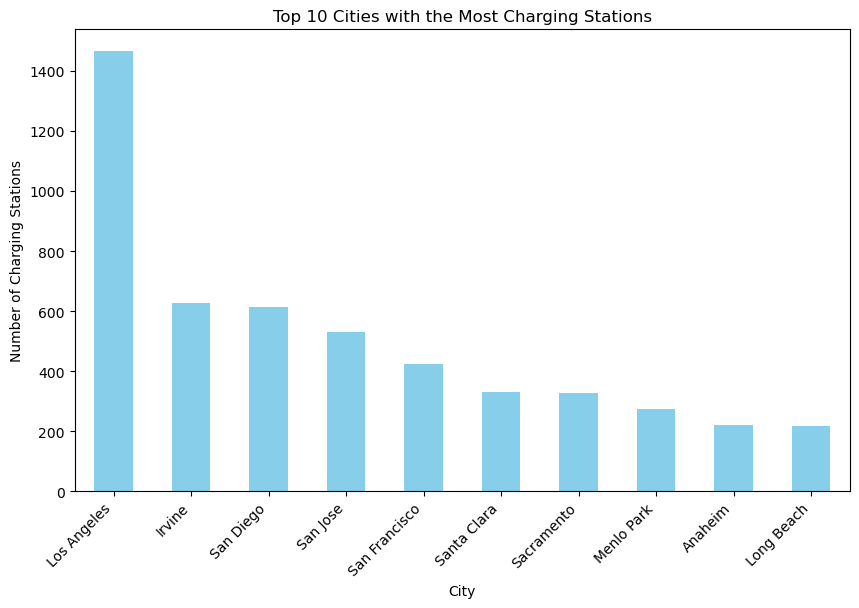

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the 10 cities with the highest number of charging stations
top_10_cities = city_counts.head(10)

# Draw the graph
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Most Charging Stations')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45, ha='right')
plt.show()



/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

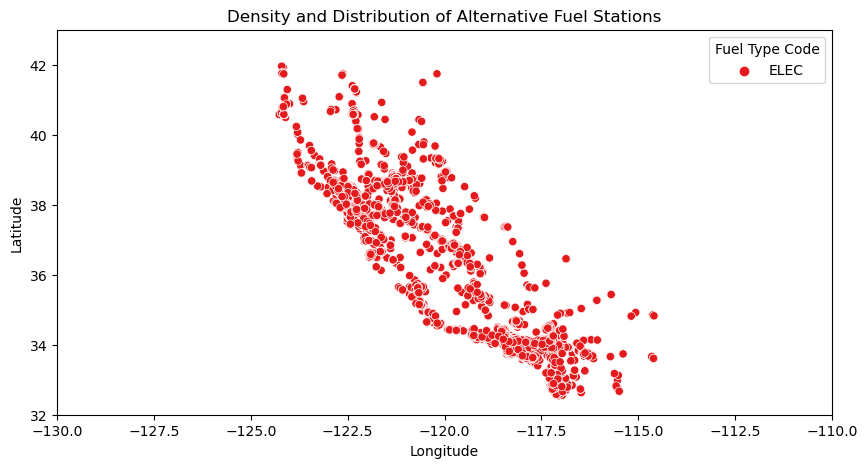

In [5]:
import seaborn as sns

# Plotting the scatter plot of the charging stations density
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Longitude', y='Latitude', data=filtered_data4, hue='Fuel Type Code', palette='Set1')
plt.xlim(-130, -110)
plt.ylim(32, 43)
plt.title('Density and Distribution of Alternative Fuel Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Fuel Type Code')
plt.show()

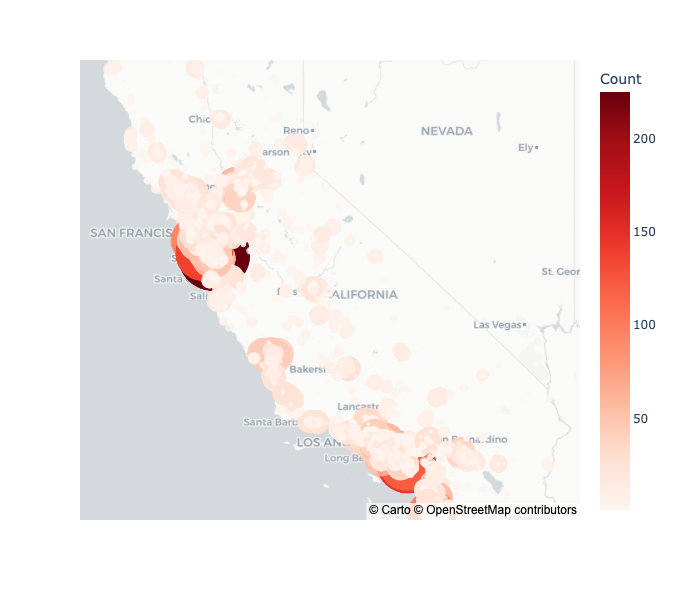

In [6]:

# Filter data for California
data_ca = filtered_data4[filtered_data4['State'] == 'CA']
# Count the number of stations per ZIP code in California
zip_counts_ca = data_ca['ZIP'].value_counts().reset_index()
zip_counts_ca.columns = ['ZIP', 'Count']
# Merge the counts with original data to get latitude and longitude for each ZIP
merged_data_ca = pd.merge(data_ca[['ZIP', 'Latitude', 'Longitude']].drop_duplicates(), zip_counts_ca, on='ZIP')
import plotly.express as px

# Make sure you have a valid Mapbox access token
mapbox_token = 'your_mapbox_token'  # Replace with your Mapbox access token
px.set_mapbox_access_token(mapbox_token)

# Create a scatter mapbox for California
fig = px.scatter_mapbox(merged_data_ca,
                        lat='Latitude',
                        lon='Longitude',
                        color='Count',
                        size='Count',
                        color_continuous_scale="reds",
                        size_max=50,
                        zoom=5,  # Adjust zoom level to focus on California
                        center={"lat": 36.7783, "lon": -119.4179},  # Center on California
                        mapbox_style="carto-positron",
                        hover_name='ZIP',
                        hover_data={'Latitude': True, 'Longitude': True, 'Count': True}
                       )
# Adjust the layout to make the map larger
fig.update_layout(
    width=800,  # Set the width to a larger size
    height=600   # Set the height to a larger size
)

# Show the map
fig.show()



## Fuel Price

In [7]:

# Correct raw URL of the Excel file on GitHub
file_path = "https://raw.githubusercontent.com/trangng99/businessproject/095cc58eafcb8186663adb28349576fd51777dc3/fuel_data.xlsx"
# Read the Excel file from GitHub using pandas
df2 = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
df2.head()


# Select columns 'Date' and 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'
df2 = df2[['Date', 'U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']]

# Format 'Date' to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Delete years before 2010 and after 2023
df2 = df2[(df2['Date'].dt.year >= 2010) & (df2['Date'].dt.year <= 2023)]

# Set up column 'Date' as index
df2.set_index('Date', inplace=True)

# Averaged by quarter
fuel_quarterly_mean = df2.resample('Q').mean()
# Return column 'Date' as a normal column
fuel_quarterly_mean_reset = fuel_quarterly_mean.reset_index()

# Delete 'Date' column
fuel_quarterly_mean_no_date = fuel_quarterly_mean_reset.drop(columns=['Date'])

# Display the results
print(fuel_quarterly_mean_no_date)



    U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
0                                            2.764000                           
1                                            2.858333                           
2                                            2.774000                           
3                                            2.938000                           
4                                            3.342333                           
5                                            3.849000                           
6                                            3.689333                           
7                                            3.425000                           
8                                            3.662333                           
9                                            3.781667                           
10                                           3.729333                           
11                          

In [8]:
# Draw the graph to illustrate the Gasoline Price
gas_graph = merged_df_new.groupby('Year')['Gasoline Prices (Dollars per Gallon)'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(gas_graph['Year'], gas_graph['Gasoline Prices (Dollars per Gallon)'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Gasoline Prices (Dollars per Gallon)')
plt.title('Gasoline Price over years')
plt.grid(True)
plt.show()

NameError: name 'merged_df_new' is not defined

## Electricity Price

In [10]:
import pandas as pd

# Correct raw URL of the Excel file on GitHub
file_path = "https://raw.githubusercontent.com/trangng99/businessproject/885f2e2f54f093b9917325c8d12a310a24075ddc/electricity_data.xlsx"

# Read the Excel file from GitHub using pandas
df1 = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
df1.head()

# Rename column
df1 = df1.rename(columns={'APU000072610': 'Electricity Price'})

# Format observation_date to datetime
df1['observation_date'] = pd.to_datetime(df1['observation_date'])

# Filter rows that satisfy the observation_date condition from 2010 to 2023
df_filtered1 = df1[(df1['observation_date'].dt.year >= 2010) & (df1['observation_date'].dt.year <= 2023)]

# Group data by year and quarter, calculate the average value of Electricity Price
df_filtered1['year'] = df_filtered1['observation_date'].dt.year
df_filtered1['quarter'] = df_filtered1['observation_date'].dt.quarter

# Calculate the average value for each year and quarter
electricity_df_avg = df_filtered1.groupby(['year', 'quarter']).agg({'Electricity Price': 'mean'}).reset_index()

# Print the results 
electricity_df_avg

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_1600/1702707769.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/db/j44xpl_d6sg85_vp_lyv00br0000gn/T/ipykernel_1600/1702707769.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



year  quarter  Electricity Price
0   2010        1           0.124000
1   2010        2           0.128333
2   2010        3           0.132667
3   2010        4           0.125667
4   2011        1           0.125667
5   2011        2           0.130000
6   2011        3           0.135000
7   2011        4           0.128333
8   2012        1           0.127667
9   2012        2           0.130333
10  2012        3           0.133000
11  2012        4           0.127333
12  2013        1           0.128667
13  2013        2           0.132000
14  2013        3           0.137000
15  2013        4           0.131000
16  2014        1           0.134333
17  2014        2           0.136667
18  2014        3           0.142333
19  2014        4           0.135000
20  2015        1           0.137333
21  2015        2           0.139000
22  2015        3           0.141667
23  2015        4           0.134333
24  2016        1           0.134000
25  2016        2           0.135000
26  2016        3           0.139000
27  2016        4           0.132667
28  2017        1           0.134333
29  2017        2           0.138000
30  2017        3           0.142333
31  2017        4           0.136333
32  2018        1           0.135000
33  2018        2           0.136333
34  2018        3           0.138667
35  2018        4           0.135000
36  2019        1           0.135333
37  2019        2           0.136667
38  2019        3           0.139333
39  2019        4           0.134000
40  2020        1           0.134000
41  2020        2           0.134667
42  2020        3           0.137000
43  2020        4           0.135667
44  2021        1           0.137000
45  2021        2           0.140333
46  2021        3           0.143667
47  2021        4           0.142000
48  2022        1           0.148333
49  2022        2           0.155000
50  2022        3           0.166000
51  2022        4           0.164667
52  2023        1           0.167333
53  2023        2           0.166667
54  2023        3           0.170000
55  2023        4           0.168667

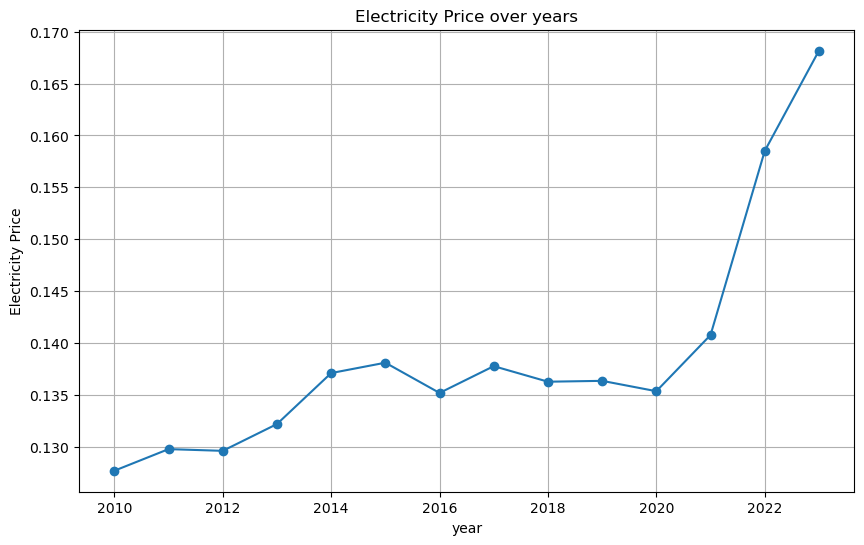

In [11]:

elec_graph = electricity_df_avg.groupby('year')['Electricity Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(elec_graph['year'], elec_graph['Electricity Price'], marker='o', linestyle='-')
plt.xlabel('year')
plt.ylabel('Electricity Price')
plt.title('Electricity Price over years')
plt.grid(True)
plt.show()

In [12]:
# Extract the 'column_name' column from each DataFrame
col1 = quarterly_ev_totals['Number of Vehicles']
col2 = stations_quarterly_counts['Charging Stations Count']
col3 = fuel_quarterly_mean_no_date['U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']
col4 = electricity_df_avg['Electricity Price']
col6 = electricity_df_avg['year']
col7 = electricity_df_avg['quarter']

# Concatenate the columns into a single DataFrame
merged_df_new = pd.concat([col6, col7, col1, col2, col3, col4], axis=1)

# Name the columns in the new DataFrame
merged_df_new.columns = ['Year', 'Quarter', 'Number of Vehicles', 'Charging Stations Count', 'Gasoline Prices (Dollars per Gallon)', 'Electricity Price']

# Display the resulting DataFrame
merged_df_new

Year  Quarter  Number of Vehicles  Charging Stations Count  \
0   2010        1                   4                        1   
1   2010        2                 358                        1   
2   2010        3                 108                        0   
3   2010        4                  12                        2   
4   2011        1                  71                       77   
5   2011        2                2981                        1   
6   2011        3                1995                        5   
7   2011        4                  32                       25   
8   2012        1                  52                       43   
9   2012        2                3244                       22   
10  2012        3                1721                       17   
11  2012        4                 138                       15   
12  2013        1                2274                       44   
13  2013        2                6943                       20   
14  2013        3               11865                       28   
15  2013        4                  85                       21   
16  2014        1                1620                       35   
17  2014        2               15656                       34   
18  2014        3               12030                       64   
19  2014        4                 214                       65   
20  2015        1                   0                       80   
21  2015        2               20488                      117   
22  2015        3               17446                       83   
23  2015        4                 435                       73   
24  2016        1                4232                       85   
25  2016        2               18212                       56   
26  2016        3               14759                       65   
27  2016        4                 426                       62   
28  2017        1                1598                       63   
29  2017        2               17256                       64   
30  2017        3               26682                       51   
31  2017        4                 436                       79   
32  2018        1                   0                      170   
33  2018        2               32390                       86   
34  2018        3               61392                      112   
35  2018        4                1266                       77   
36  2019        1                2434                      108   
37  2019        2               23770                       82   
38  2019        3               68079                      125   
39  2019        4                 320                      123   
40  2020        1                2547                      311   
41  2020        2               38056                     1679   
42  2020        3               65104                      204   
43  2020        4                 239                      254   
44  2021        1               32752                     3813   
45  2021        2               37335                      373   
46  2021        3               43337                      461   
47  2021        4               46842                      643   
48  2022        1               59364                      531   
49  2022        2               58946                      738   
50  2022        3               65204                      640   
51  2022        4               78562                      593   
52  2023        1               85580                      578   
53  2023        2              102602                      723   
54  2023        3               99980                      519   
55  2023        4               86506                      533   

    Gasoline Prices (Dollars per Gallon)  Electricity Price  
0                               2.764000           0.124000  
1                               2.858333           0.128333  
2                               2.774000           0.13

In [13]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  56 non-null     int32  
 1   Quarter                               56 non-null     int32  
 2   Number of Vehicles                    56 non-null     int64  
 3   Charging Stations Count               56 non-null     int64  
 4   Gasoline Prices (Dollars per Gallon)  56 non-null     float64
 5   Electricity Price                     56 non-null     float64
dtypes: float64(2), int32(2), int64(2)
memory usage: 2.3 KB


In [14]:
merged_df_new.to_excel('merged_df_new.xlsx', index=False)

# Get descriptive statistics for all numerical variables
merged_df_new.describe()

Year    Quarter  Number of Vehicles  Charging Stations Count  \
count    56.00000  56.000000           56.000000                56.000000   
mean   2016.50000   2.500000        22785.357143               265.607143   
std       4.06761   1.128152        29803.664450               565.182020   
min    2010.00000   1.000000            0.000000                 0.000000   
25%    2013.00000   1.750000          409.000000                34.750000   
50%    2016.50000   2.500000         5587.500000                78.000000   
75%    2020.00000   3.250000        37515.250000               268.250000   
max    2023.00000   4.000000       102602.000000              3813.000000   

       Gasoline Prices (Dollars per Gallon)  Electricity Price  
count                             56.000000          56.000000  
mean                               3.068917           0.138756  
std                                0.606905           0.011336  
min                                2.000000           0.124000  
25%                                2.612333           0.132917  
50%                                2.940667           0.135500  
75%                                3.635667           0.139583  
max                                4.596667           0.170000

# 2. Exploratory Data Analysis

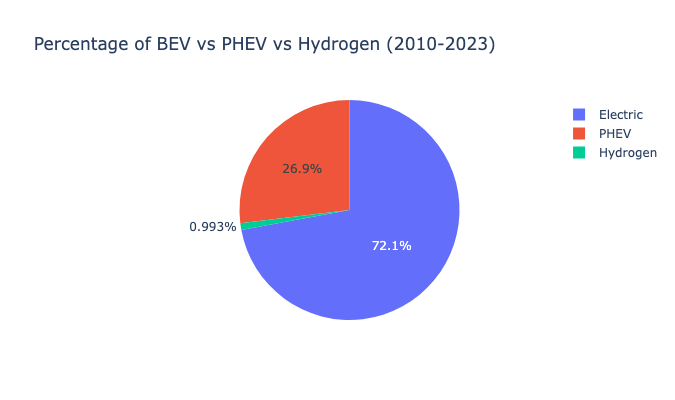

In [15]:
#Percentage of BEV vs PHEV

import plotly.express as px

# Filter for years 2010 to 2023
filtered_years_df5 = df5[(df5['Data_Year'] >= 2010) & (df5['Data_Year'] <= 2023)]

# Filter for relevant fuel types
filtered_df5 = filtered_years_df5[filtered_years_df5['FUEL_TYPE'].isin(['Electric', 'PHEV', 'Hydrogen'])]

# Calculate the count of each type
vehicle_counts = filtered_df5.groupby('FUEL_TYPE')['Number of Vehicles'].sum()

# Compute the percentage of each type
total_vehicles = vehicle_counts.sum()
percentages = (vehicle_counts / total_vehicles) * 100

# Prepare data for the pie chart
vehicle_types = percentages.index
values = percentages.values

# Create a pie chart
fig = px.pie(names=vehicle_types, values=values, title='Percentage of BEV vs PHEV vs Hydrogen (2010-2023)', height=400)
fig.show()


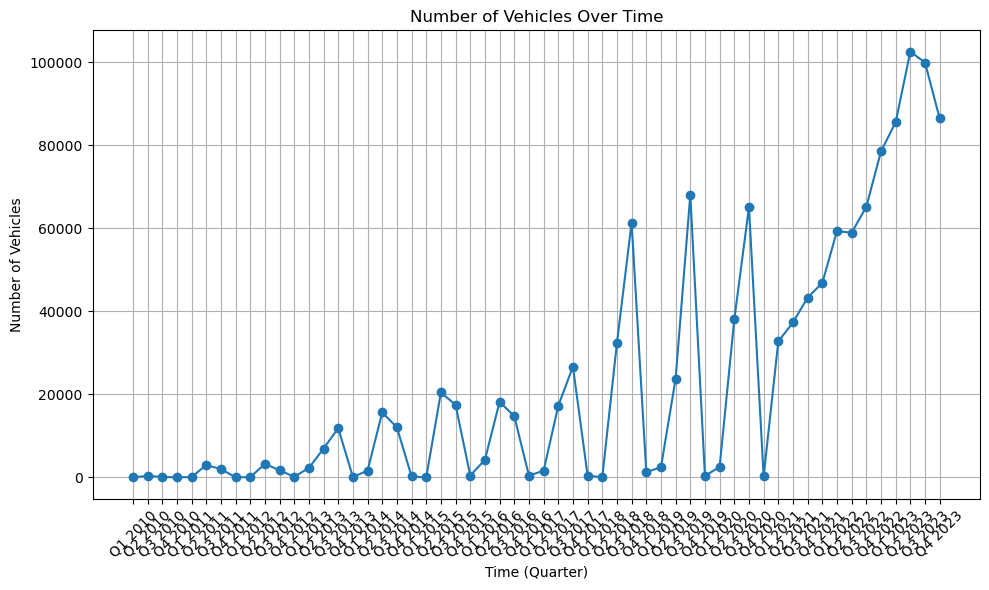

In [16]:
merged_df_new['Time'] = (merged_df_new['Year'] - merged_df_new['Year'].min()) * 4 + merged_df_new['Quarter']
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(merged_df_new['Time'], merged_df_new['Number of Vehicles'], marker='o', linestyle='-')
plt.xlabel('Time (Quarter)')
plt.ylabel('Number of Vehicles')
plt.title('Number of Vehicles Over Time')
plt.xticks(ticks=merged_df_new['Time'], labels=[f'Q{q} {y}' for y, q in zip(merged_df_new['Year'], merged_df_new['Quarter'])], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



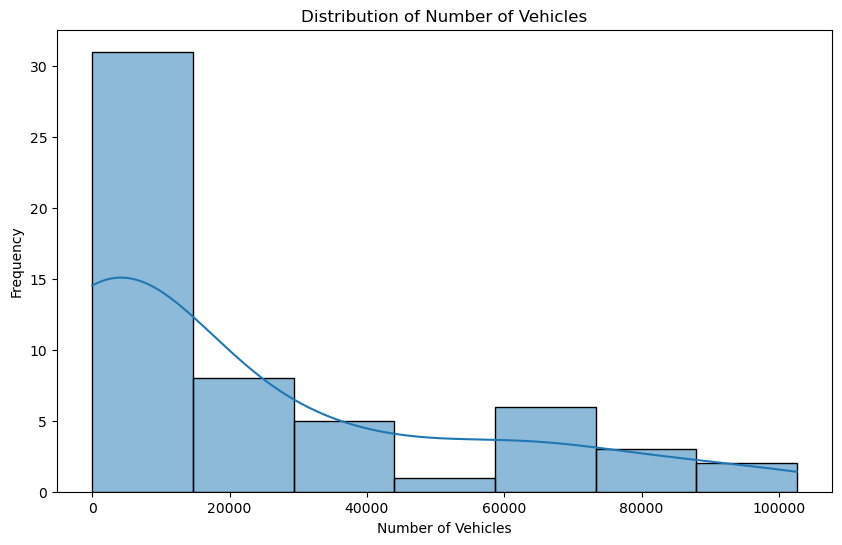

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



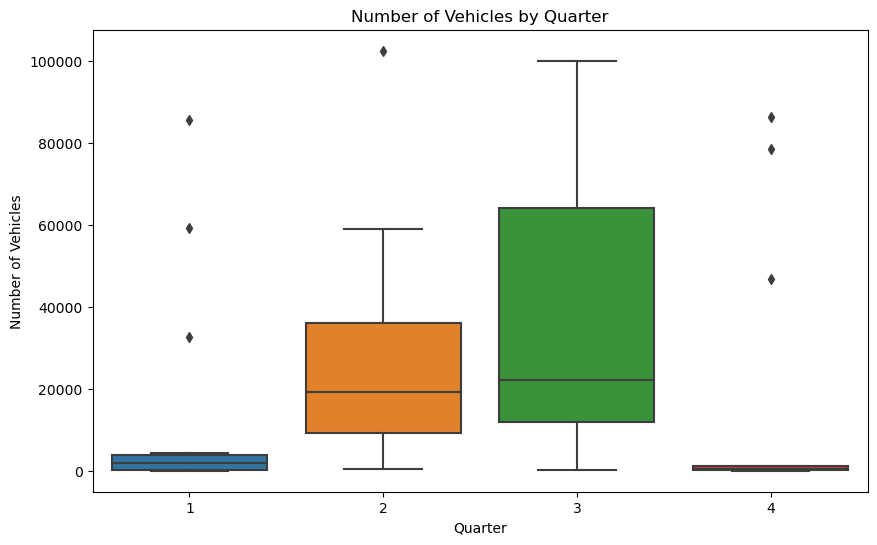

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



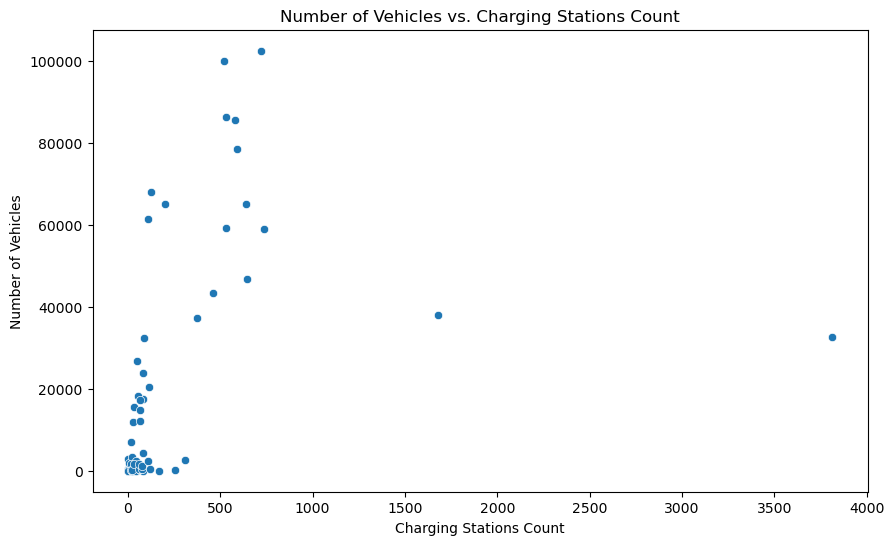

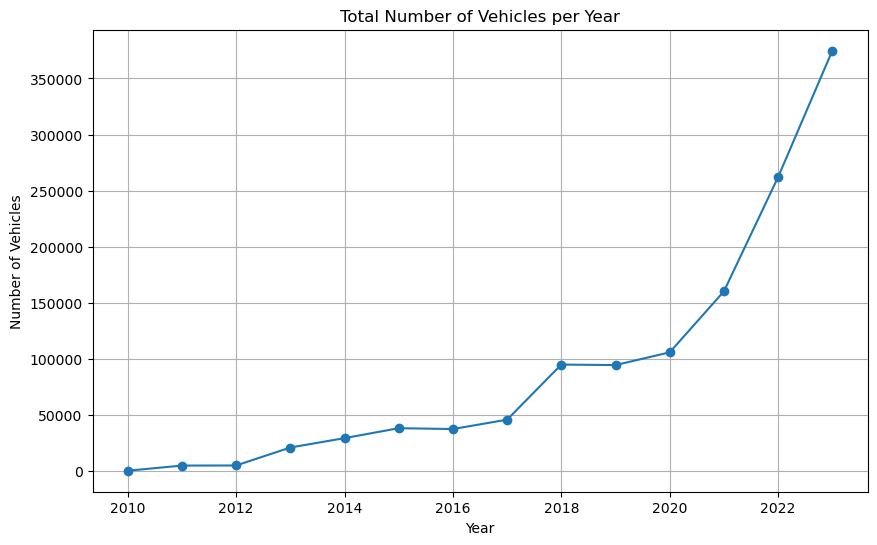

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



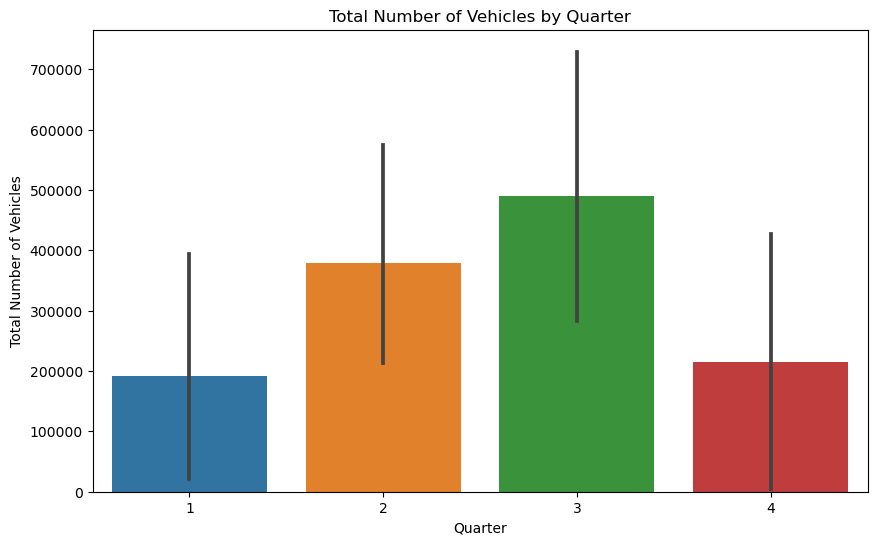

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for electric vehicles
electric_vehicles_df = filtered_df5[filtered_df5['FUEL_TYPE'] == 'Electric']

# 1. Histograms and Density Plots
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_new['Number of Vehicles'], kde=True)
plt.title('Distribution of Number of Vehicles')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quarter', y='Number of Vehicles', data=merged_df_new)
plt.title('Number of Vehicles by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Vehicles')
plt.show()

# 3. Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Stations Count', y='Number of Vehicles', data=merged_df_new)
plt.title('Number of Vehicles vs. Charging Stations Count')
plt.xlabel('Charging Stations Count')
plt.ylabel('Number of Vehicles')
plt.show()

# 4. Line Plots

df_yearly = merged_df_new.groupby('Year')['Number of Vehicles'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_yearly['Year'], df_yearly['Number of Vehicles'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Total Number of Vehicles per Year')
plt.grid(True)
plt.show()

# 5. Bar Plots
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Number of Vehicles', data=merged_df_new, estimator=sum)
plt.title('Total Number of Vehicles by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Number of Vehicles')
plt.show()


# 3. Correlation Heatmap

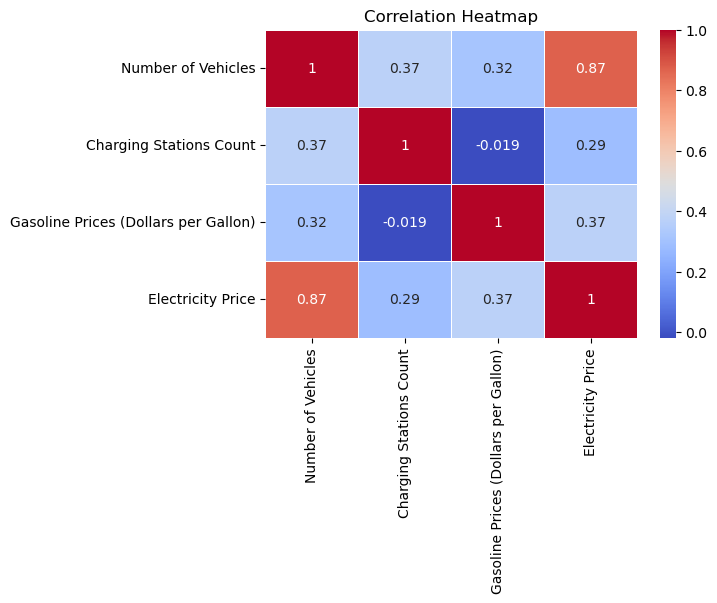

In [18]:
# Select specific columns
selected_columns = ['Number of Vehicles', 
                    'Charging Stations Count', 
                    'Gasoline Prices (Dollars per Gallon)', 
                    'Electricity Price']

df_selected = merged_df_new[selected_columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the independent variables (X)
X = merged_df_new.drop(columns=['Number of Vehicles'])  
# Add a constant to the model (intercept)
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning:

divide by zero encountered in scalar divide

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning:

divide by zero encountered in scalar divide



Feature       VIF
0                                 const  0.000000
1                                  Year       inf
2                               Quarter       inf
3               Charging Stations Count  1.372435
4  Gasoline Prices (Dollars per Gallon)  1.571329
5                     Electricity Price  3.800099
6                                  Time       inf

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is d

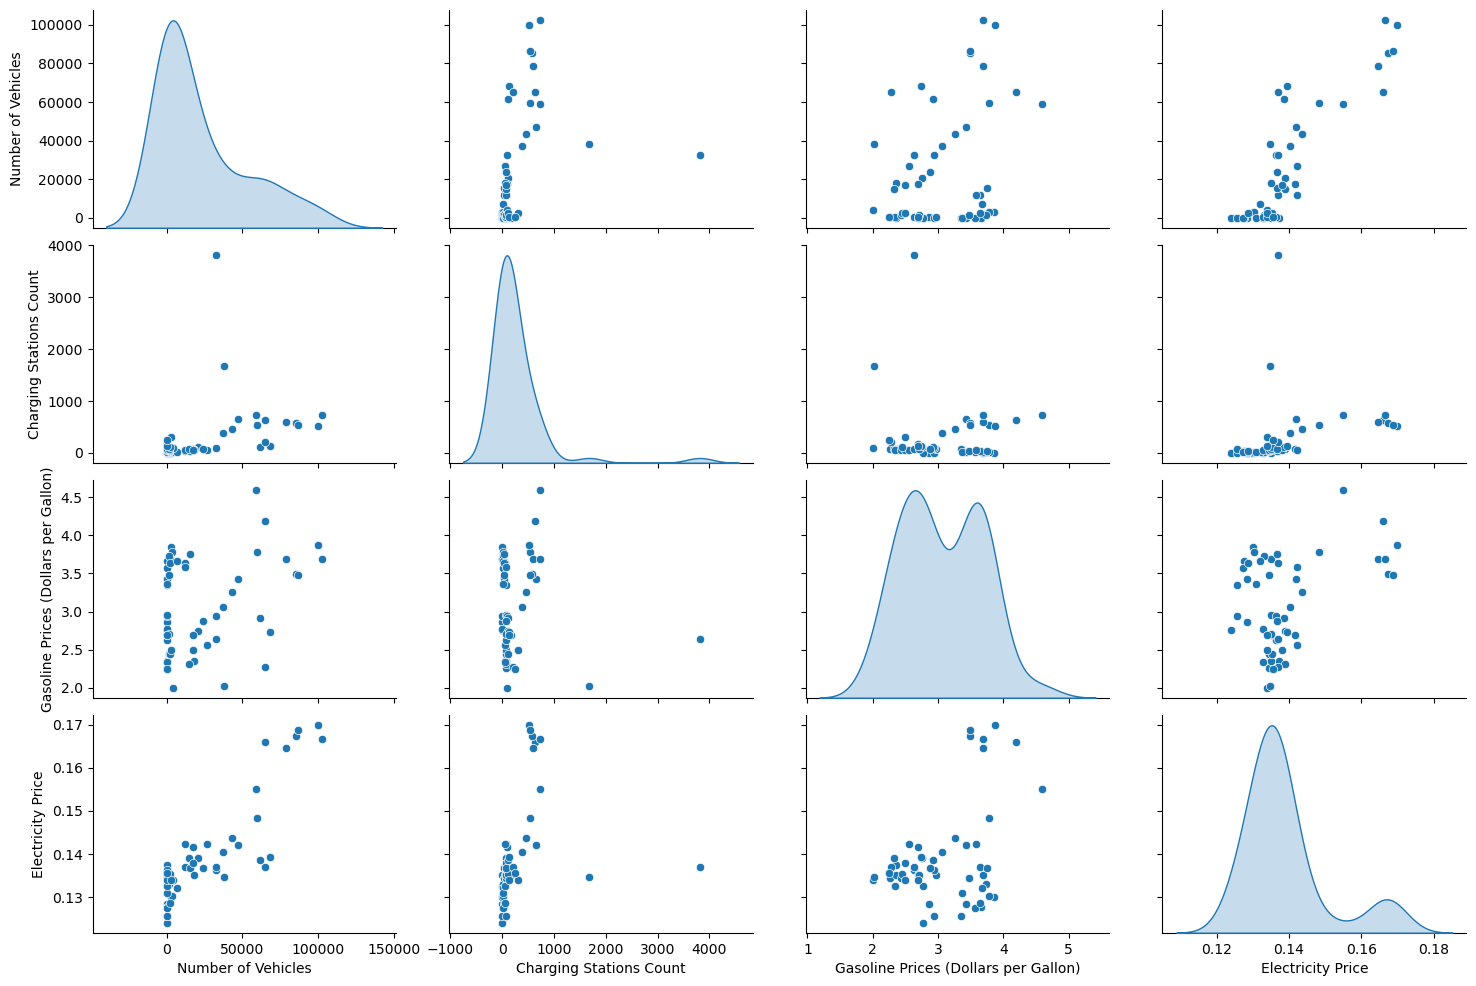

In [20]:
plot= merged_df_new[["Number of Vehicles",
    "Charging Stations Count",
    "Gasoline Prices (Dollars per Gallon)",
    "Electricity Price"]]

sns.pairplot(plot, diag_kind='kde', height=2.5, aspect=1.5)
plt.show()

# 4. Regression Model

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ngtrg_/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



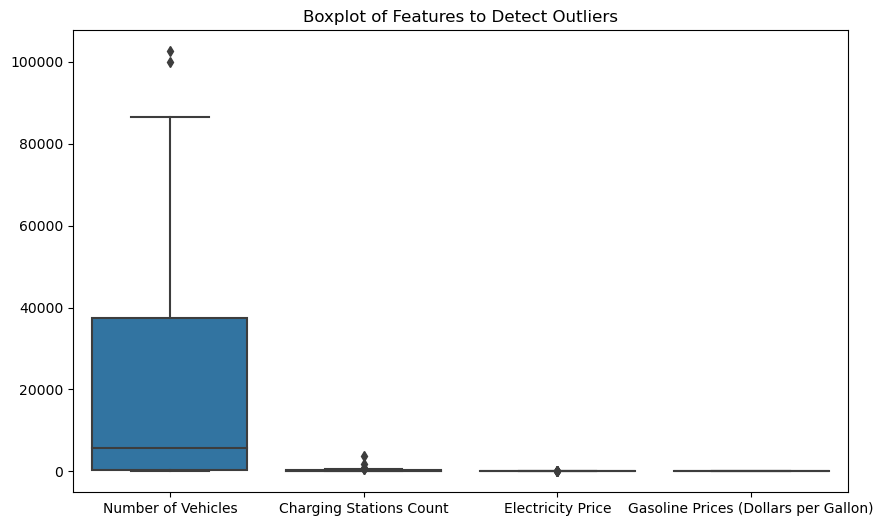

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df_new[['Number of Vehicles', 'Charging Stations Count', 'Electricity Price', 'Gasoline Prices (Dollars per Gallon)']])
plt.title('Boxplot of Features to Detect Outliers')
plt.show()

### Model Comparison

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Features and Target
X = merged_df_new[['Charging Stations Count', 'Electricity Price', 'Gasoline Prices (Dollars per Gallon)']]
Y = merged_df_new['Number of Vehicles']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_scaled, Y)
linear_predictions = linear_model.predict(X_scaled)
linear_rmse = np.sqrt(mean_squared_error(Y, linear_predictions))
linear_mae = mean_absolute_error(Y, linear_predictions)
linear_r2 = linear_model.score(X_scaled, Y)
print("Linear Regression RMSE:", linear_rmse)
print("Linear Regression MAE:", linear_mae)
print("Linear Regression R2:", linear_r2)

# Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(X_scaled, Y)
best_ridge = ridge_grid.best_estimator_
ridge_predictions = best_ridge.predict(X_scaled)
ridge_rmse = np.sqrt(mean_squared_error(Y, ridge_predictions))
ridge_mae = mean_absolute_error(Y, ridge_predictions)
ridge_r2 = best_ridge.score(X_scaled, Y)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R2:", ridge_r2)
print("Best Ridge Params:", ridge_grid.best_params_)

# Lasso Regression with Hyperparameter Tuning
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(X_scaled, Y)
best_lasso = lasso_grid.best_estimator_
lasso_predictions = best_lasso.predict(X_scaled)
lasso_rmse = np.sqrt(mean_squared_error(Y, lasso_predictions))
lasso_mae = mean_absolute_error(Y, lasso_predictions)
lasso_r2 = best_lasso.score(X_scaled, Y)
print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression MAE:", lasso_mae)
print("Lasso Regression R2:", lasso_r2)
print("Best Lasso Params:", lasso_grid.best_params_)

model_performance = {
    'Linear Regression': {'RMSE': linear_rmse, 'R2': linear_r2, 'model': linear_model},
    'Ridge Regression': {'RMSE': ridge_rmse, 'R2': ridge_r2, 'model': best_ridge},
    'Lasso Regression': {'RMSE': lasso_rmse, 'R2': lasso_r2, 'model': best_lasso}
}

best_model_name = min(model_performance, key=lambda x: model_performance[x]['RMSE'])
best_model = model_performance[best_model_name]['model']

print(f"Best Model: {best_model_name}")


Linear Regression RMSE: 13945.24774047848
Linear Regression MAE: 10187.354792007609
Linear Regression R2: 0.7770854198903933
Ridge Regression RMSE: 13953.02772519408
Ridge Regression MAE: 10075.889838857702
Ridge Regression R2: 0.7768366246263274
Best Ridge Params: {'alpha': 1.0}
Lasso Regression RMSE: 13946.026770408102
Lasso Regression MAE: 10192.59257117328
Lasso Regression R2: 0.7770605136307942
Best Lasso Params: {'alpha': 100.0}
Best Model: Linear Regression


In [50]:
from sklearn.model_selection import cross_val_score
# Features and Target
X = merged_df_new[['Charging Stations Count', 'Electricity Price', 'Gasoline Prices (Dollars per Gallon)']]
Y = merged_df_new['Number of Vehicles']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear Regression with Cross-Validation
linear_model = LinearRegression()
# Perform 5-fold cross-validation
cv_scores = cross_val_score(linear_model, X_scaled, Y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
cv_rmse_scores = np.sqrt(-cv_scores)
cv_rmse_mean = cv_rmse_scores.mean()
cv_rmse_std = cv_rmse_scores.std()

# Calculate cross-validated R^2 scores
cv_r2_scores = cross_val_score(linear_model, X_scaled, Y, cv=5, scoring='r2')
cv_r2_mean = cv_r2_scores.mean()
cv_r2_std = cv_r2_scores.std()

print("Linear Regression Cross-Validated RMSE (Mean):", cv_rmse_mean)
print("Linear Regression Cross-Validated RMSE (Std Dev):", cv_rmse_std)
print("Linear Regression Cross-Validated R2 (Mean):", cv_r2_mean)
print("Linear Regression Cross-Validated R2 (Std Dev):", cv_r2_std)


Linear Regression Cross-Validated RMSE (Mean): 19683.182598258405
Linear Regression Cross-Validated RMSE (Std Dev): 16574.77414451554
Linear Regression Cross-Validated R2 (Mean): -7.7786780685343615
Linear Regression Cross-Validated R2 (Std Dev): 13.579384741798544


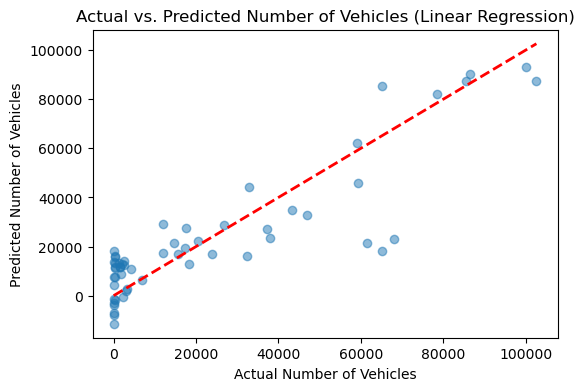

In [23]:
# Plotting the Actual vs. Predicted Values for the Best Model
plt.figure(figsize=(6, 4))
plt.scatter(Y, linear_predictions, alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=2)
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('Predicted Number of Vehicles')
plt.title(f'Actual vs. Predicted Number of Vehicles ({best_model_name})')
plt.show()

### OLS before removing outliers

                            OLS Regression Results                            
Dep. Variable:     Number of Vehicles   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     60.42
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           5.82e-17
Time:                        03:03:52   Log-Likelihood:                -613.86
No. Observations:                  56   AIC:                             1236.
Df Residuals:                      52   BIC:                             1244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.279e+04   1933.858     11.782      0.0

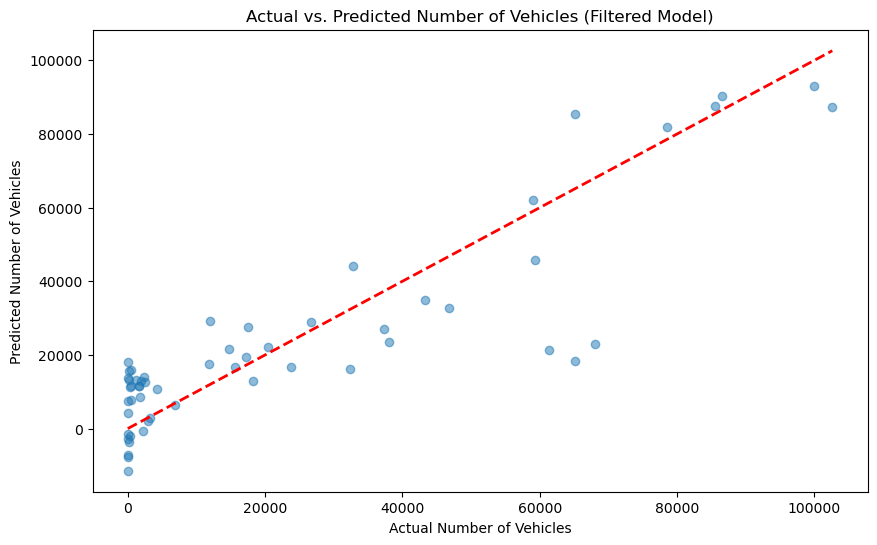

In [24]:
import statsmodels.api as sm

X_filtered = merged_df_new[['Charging Stations Count', 'Electricity Price', 'Gasoline Prices (Dollars per Gallon)']]
Y_filtered = merged_df_new['Number of Vehicles']

scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtered)
X_scaled_filtered = sm.add_constant(X_scaled_filtered)

model_filtered = sm.OLS(Y_filtered, X_scaled_filtered).fit()
print(model_filtered.summary())

model_filtered_sklearn = LinearRegression().fit(X_scaled_filtered, Y_filtered)
predictions_filtered = model_filtered_sklearn.predict(X_scaled_filtered)
rmse_filtered = mean_squared_error(Y_filtered, predictions_filtered, squared=False)
mae_filtered = mean_absolute_error(Y_filtered, predictions_filtered)

print("RMSE:", rmse_filtered)
print("MAE:", mae_filtered)

# Vẽ lại biểu đồ Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(Y_filtered, predictions_filtered, alpha=0.5)
plt.plot([Y_filtered.min(), Y_filtered.max()], [Y_filtered.min(), Y_filtered.max()], 'r--', lw=2)
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('Predicted Number of Vehicles')
plt.title('Actual vs. Predicted Number of Vehicles (Filtered Model)')
plt.show()


### OLS after removing outliers

                            OLS Regression Results                            
Dep. Variable:     Number of Vehicles   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     148.4
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           2.79e-24
Time:                        08:05:26   Log-Likelihood:                -545.95
No. Observations:                  52   AIC:                             1100.
Df Residuals:                      48   BIC:                             1108.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.954e+04   1267.110     15.423      0.0

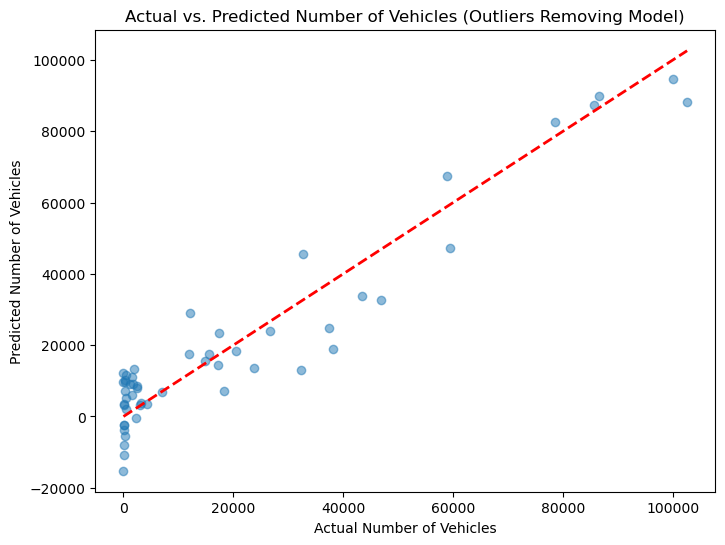

In [126]:
import statsmodels.api as sm

outliers_to_remove = [34, 38, 42, 50]
filtered_df = merged_df_new.drop(outliers_to_remove, inplace=False).reset_index(drop=True)

X_filtered = filtered_df[['Charging Stations Count', 'Electricity Price', 'Gasoline Prices (Dollars per Gallon)']]
Y_filtered = filtered_df['Number of Vehicles']

scaler = StandardScaler()
X_scaled_filtered = scaler.fit_transform(X_filtered)
X_scaled_filtered = sm.add_constant(X_scaled_filtered)

model_filtered = sm.OLS(Y_filtered, X_scaled_filtered).fit()
print(model_filtered.summary())

model_filtered_sklearn = LinearRegression().fit(X_scaled_filtered, Y_filtered)
predictions_filtered = model_filtered_sklearn.predict(X_scaled_filtered)
rmse_filtered = mean_squared_error(Y_filtered, predictions_filtered, squared=False)
mae_filtered = mean_absolute_error(Y_filtered, predictions_filtered)

print("RMSE:", rmse_filtered)
print("MAE:", mae_filtered)

# Draw Actual vs. Predicted Graph
plt.figure(figsize=(8, 6))
plt.scatter(Y_filtered, predictions_filtered, alpha=0.5)
plt.plot([Y_filtered.min(), Y_filtered.max()], [Y_filtered.min(), Y_filtered.max()], 'r--', lw=2)
plt.xlabel('Actual Number of Vehicles')
plt.ylabel('Predicted Number of Vehicles')
plt.title('Actual vs. Predicted Number of Vehicles (Outliers Removing Model)')
plt.show()


In [127]:
print("Details of outliers removed:")
merged_df_new.loc[outliers_to_remove, ['Year', 'Quarter', 'Number of Vehicles', 'Charging Stations Count', 'Electricity Price', 'Gasoline Prices (Dollars per Gallon)']]


Details of outliers removed:


Year  Quarter  Number of Vehicles  Charging Stations Count  \
34  2018        3               61392                      112   
38  2019        3               68079                      125   
42  2020        3               65104                      204   
50  2022        3               65204                      640   

    Electricity Price  Gasoline Prices (Dollars per Gallon)  
34           0.138667                              2.919000  
38           0.139333                              2.737000  
42           0.137000                              2.272667  
50           0.166000                              4.190667

In [27]:
print(f"Original number of rows: {len(merged_df_new)}")
print(f"Number of rows after removing outliers: {len(filtered_df)}")
print(f"Number of outliers removed: {len(outliers_to_remove)}")


Original number of rows: 56
Number of rows after removing outliers: 52
Number of outliers removed: 4


### Checking Residuals

In [29]:
# Calculate residuals
residuals = Y_filtered - predictions_filtered


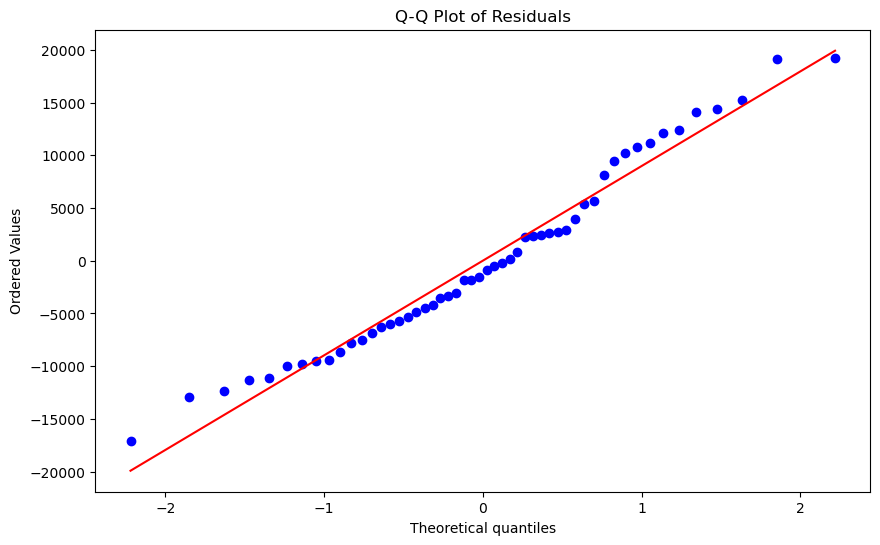

In [30]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


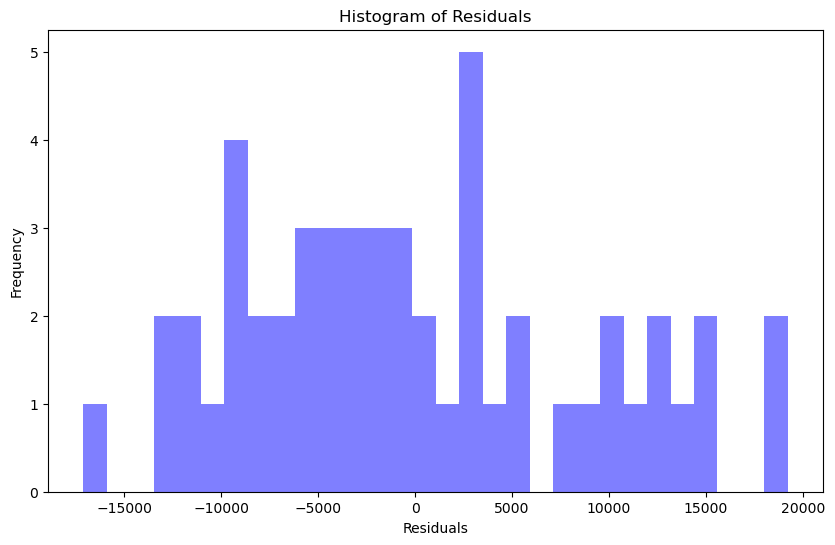

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.5, color='blue')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
